In [151]:
#IMPORTS

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys,os
import enchant  #pip install pyenchant
%run datuslib.ipynb

In [153]:
NEGATIVE_WORDS = getWordInListFromFile('badWords.txt')

In [154]:
#SETTINGS

sns.set(rc = {'figure.figsize':(15,5)})
sns.set(font_scale = 1.7)

In [155]:
#CARGA DATA

tweets = pd.read_csv(generateAbsolutePath("train.csv"))

In [156]:
#(AGREGA) CAMPO DE TARGET CON NOMBRES MAS DETALLADOS QUE 1 o 0

tweets1 = tweets

tweets1['target detallado'] = tweets.apply(lambda row : labelDisasterType(row['target']), axis = 1)

In [157]:
#(AGREGA) CAMPO DE LONGITUD DE TWEETS

tweets2 = tweets1

tweets2['length'] = tweets2.apply(lambda row : len(row['text']), axis = 1)

In [158]:
#(AGREGA) CAMPO DE PALABRAS NEGATIVAS

tweets3 = tweets2

tweets3['uses negative words'] = tweets2.apply(lambda row : int(hasNegativeWords(row['text'])), axis = 1)

In [159]:
tweets3[ tweets3['uses negative words'] == 1]['uses negative words'].count()

3017

In [160]:
tweets3[ tweets3['uses negative words'] == 0]['uses negative words'].count()

4596

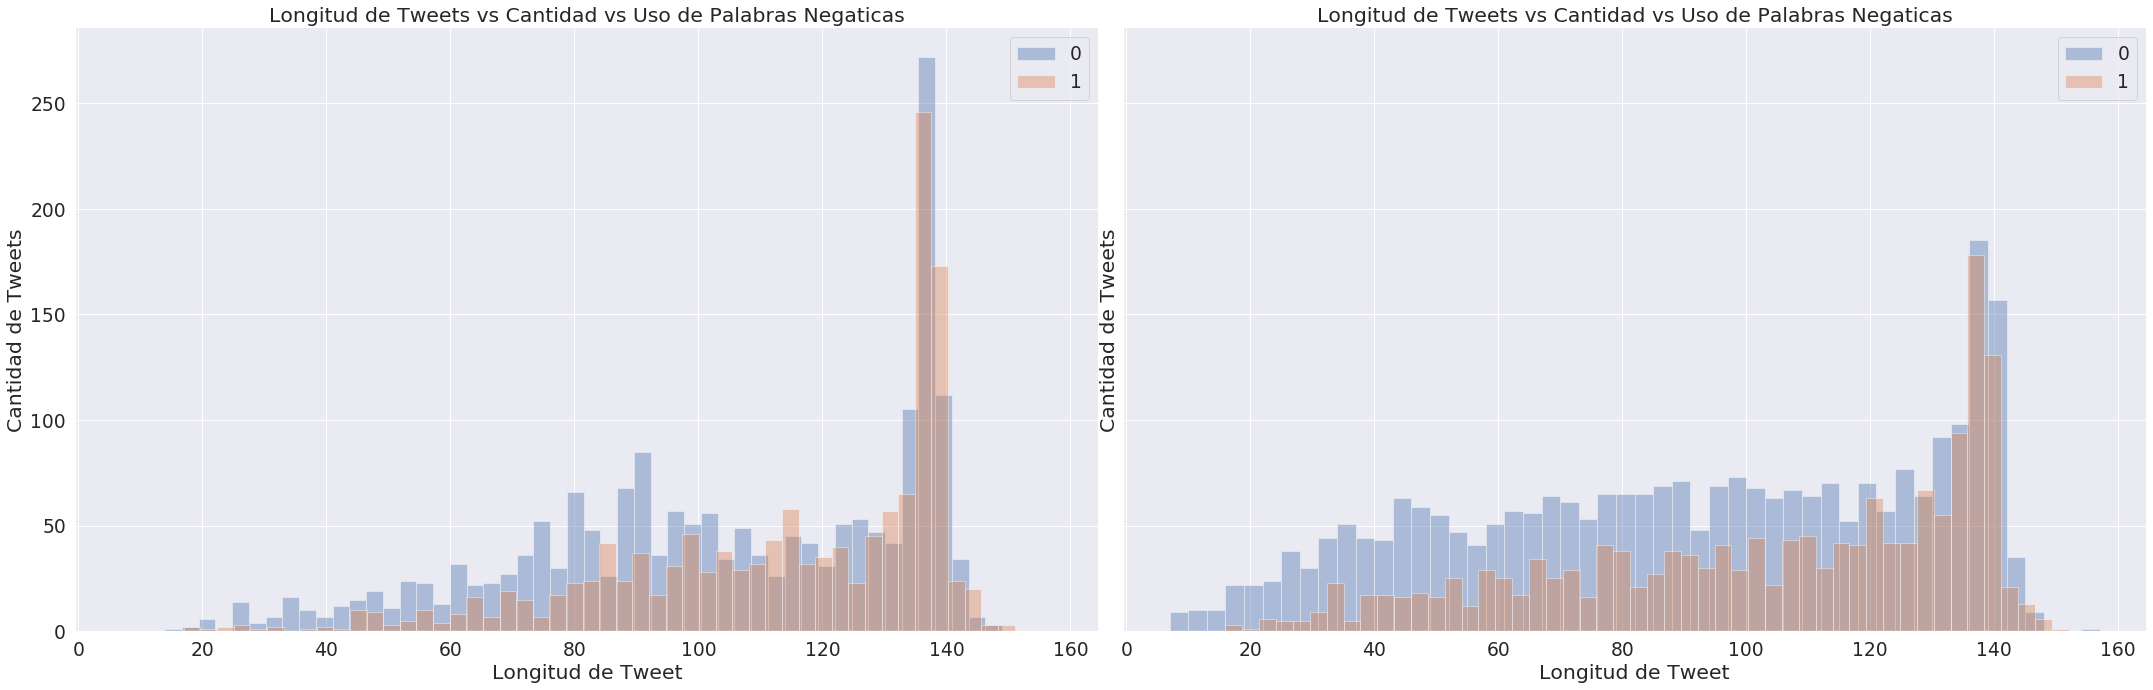

In [161]:
fg1 = sns.FacetGrid(tweets3, hue = "uses negative words",col = 'target detallado', height = 10, aspect = 1.5)
v = fg1.map(sns.distplot, "length", kde = False, bins = 50 )
v.set(xlabel = 'Longitud de Tweet', ylabel = 'Cantidad de Tweets', 
      title = 'Longitud de Tweets vs Cantidad vs Uso de Palabras Negaticas')

for ax in v.axes.ravel():
    ax.legend()

In [162]:
listWords = tweets['text'].sum().split(' ')

In [163]:
bagOfWords = set(listWords)

In [164]:
bagOfEnglishWords = set()
bagOfNonEnglishWords = set()
for word in bagOfWords:
    processedWord = getEnlgishWord(word)
    if processedWord[0] == '1':
        bagOfEnglishWords.add(processedWord[1:])
    else:
        bagOfNonEnglishWords.add(processedWord)

In [165]:
bagOfEnglishWords

{'',
 'cladding',
 'tonight',
 'both',
 'Favorite',
 'molten',
 'Constellation',
 'own',
 'lemon',
 'YouTube',
 'WHAT',
 'ski',
 'Pox',
 'Eaton',
 'vision-the',
 'Chill',
 'matter',
 'eat',
 'chemicals',
 'college',
 'Abe',
 'spaceship',
 'Gun',
 'Wt',
 'radiation',
 'the',
 'dealing',
 'Iraq',
 'Everything',
 'raft',
 'SHES',
 'Noel',
 'Tyrone',
 'dude',
 'foreign',
 'CEO',
 'Came',
 'racing',
 'yeti',
 'MP',
 'Wreckage',
 'arr',
 'shooter',
 'taking',
 'Chilling',
 'Writing',
 'yolk',
 'BOB',
 'Junkies',
 'purchase',
 'Expansion',
 'imprison',
 'windows',
 'remove',
 'chips',
 'Restored',
 'Haunting',
 'senior',
 'Senators',
 'spreads',
 'guests',
 'ice',
 'Status',
 'Ice',
 'expose',
 'US-',
 'Spending',
 'dress',
 'maps',
 'reboot',
 'asks',
 'Clapton',
 'Decoration',
 'veg',
 'Parker',
 'ones',
 'CYCLONE',
 'dominant',
 'Syndrome',
 'Flood',
 'Cat',
 'Pearl',
 'exceptionally',
 'bis',
 'Naturally',
 'NOT',
 'worst',
 'boxes',
 'Down',
 'Chevrolet',
 'SIGN',
 'desert',
 "DIDN'T",
 

In [166]:
# filtrar las palabras de bagOgValidWords sobre las NEGATIVE_WORDS para ver si hay palabras utiles nuevas
# la idea es obtener todas las palabras que indiquen un desastre
# ver que las palabras que quedan en el set. Si en el queda alguna palabra de desastre que no tenemos en NEGATIVE_WORDS la metemos

In [167]:
tweets5['appearing users'] = tweets5.apply(lambda row : extractUsers(row['text']), axis = 1)

usuarios = tweets5['appearing users'].sum()

tweets6 = tweets5[tweets5.apply(lambda row : len(row['appearing users']) > 0, axis = 1)]

frecUsers = {i:usuarios.count(i) for i in usuarios}

usersDF = pd.DataFrame(pd.Series(frecUsers, index = frecUsers.keys()))

usersDF.rename(columns={0:'popularidad'}, inplace=True)

topUsers = usersDF.sort_values('popularidad', ascending = False).head(20)

topUsers = topUsers.reset_index()

topUsers.rename(columns={'index':'user'}, inplace=True)

NameError: name 'tweets5' is not defined

In [ ]:
sns.barplot(x = topUsers['popularidad'], y = topUsers['user'], data = topUsers)

NameError: name 'datuslib' is not defined